In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'

In [2]:
import numpy as np
import tensorflow as tf
import scipy
from tensorflow.keras import layers,Sequential


In [3]:
Pnuemonia_train=os.path.join("C:\\Users\\ROG STRIX\\Desktop\\xray_dataset_covid19\\train\\PNEUMONIA")
normal_train=os.path.join("C:\\Users\\ROG STRIX\\Desktop\\xray_dataset_covid19\\train\\NORMAL")

Pnuemonia_test=os.path.join("C://Users//ROG STRIX//Desktop//xray_dataset_covid19//test//PNEUMONIA")
normal_test=os.path.join("C://Users//ROG STRIX//Desktop//xray_dataset_covid19//test//NORMAL")

In [4]:
train_Pnuemonia_names=os.listdir(Pnuemonia_train)

train_normal_names=os.listdir(normal_train)

test_Pnuemonia_names=os.listdir(Pnuemonia_test)

test_normal_names=os.listdir(normal_test)

In [5]:
print('total training Pnuemonia images:', len(train_Pnuemonia_names))
print('total training Normal images:', len(train_normal_names))
print('total testing Pnuemonia images:', len(test_Pnuemonia_names))
print('total testing Normal images:', len(test_normal_names))

total training Pnuemonia images: 74
total training Normal images: 74
total testing Pnuemonia images: 20
total testing Normal images: 20


In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 2
ncols = 5

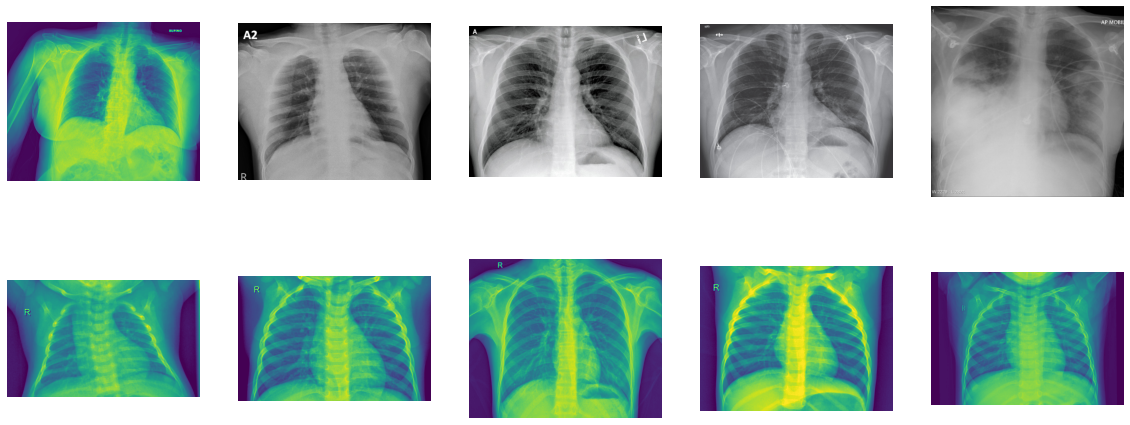

In [7]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

train_Pnuemonia =  [os.path.join(Pnuemonia_train, fname) for fname in np.random.choice(train_Pnuemonia_names, 4, replace=False)]
train_normal =  [os.path.join(normal_train, fname) for fname in np.random.choice(train_normal_names, 4, replace=False)]
test_Pnuemonia = [os.path.join(Pnuemonia_test, str(np.random.choice(test_Pnuemonia_names)))]
test_normal = [os.path.join(normal_test, str(np.random.choice(test_normal_names)))]

for i, img_path in enumerate(train_Pnuemonia + test_Pnuemonia + train_normal + test_normal):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        "C:\\Users\\ROG STRIX\\Desktop\\xray_dataset_covid19\\train",  # This is the source directory for training images
        target_size=(800, 800),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')


# Flow training images in batches of 128 using train_datagen generator
test_generator = train_datagen.flow_from_directory(
       "C://Users//ROG STRIX//Desktop//xray_dataset_covid19//test" ,  # This is the source directory for training images
        target_size=(800, 800),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [9]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(800, 800, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('normal') and 1 for the other ('abnormal')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [10]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(800, 800, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('normal') and 1 for the other ('abnormal')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.1),
              metrics=['accuracy'])

In [15]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=1,  
      epochs=2,
      verbose=1)

Epoch 1/2
1/1 [==============================] - 14s 14s/step - loss: 27998342348800.0000 - accuracy: 0.6000
Epoch 2/2
1/1 [==============================] - 11s 11s/step - loss: 6354026496.0000 - accuracy: 0.5500


In [16]:
pred = model.predict_generator(test_generator)

In [17]:
pred.astype(int)

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [18]:
test_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [19]:
history.history

{'loss': [27998342348800.0, 6354026496.0],
 'accuracy': [0.6000000238418579, 0.550000011920929]}

In [21]:
from keras.models import load_model 
model.save("network.h5") 
loaded_model = load_model("network.h5") 
loss, accuracy = loaded_model.evaluate(test_generator,pred)